In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
df = pd.read_parquet("all_NLP_features.parquet")
tones = pd.read_parquet("word_tone.parquet")

In [5]:
df = df.drop(['transcript_tokens', 'transcript_words'], axis=1)

bar_order = ['AAA', 'AA', 'A', 'BBB', 'BB', 'B', 'CCC', 'CC', 'C', 'D']
# Assign values of Rating to this ordering
df['Rating'] = pd.Categorical(df['Rating'], categories=bar_order, ordered=True)

In [8]:
df['tone'] = tones['TONE1']

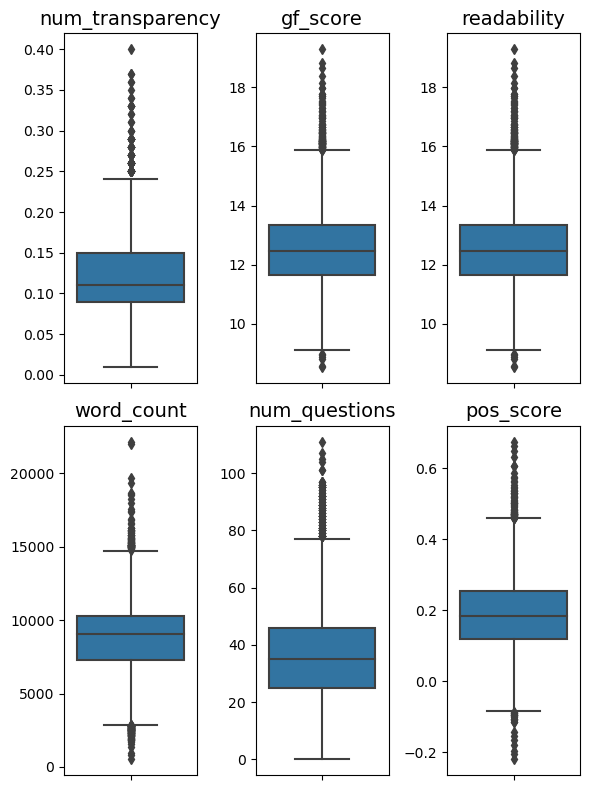

In [20]:
df_box = df.loc[:, 'num_transparency':'pos_score']

fig, axes = plt.subplots(2, 3, figsize=(6, 8))  # Adjust the size as needed
axes = axes.flatten()  # Flatten the grid for easy iteration

for i, col in enumerate(df_box.columns):
    sns.boxplot(y=df_box[col], ax=axes[i])
    axes[i].set_title(col, fontsize=14)
    axes[i].set_ylabel('')

# Hide any unused subplots if the number of plots is not a multiple of grid size
for ax in axes[len(df_box.columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()


## Corr plot

<AxesSubplot: >

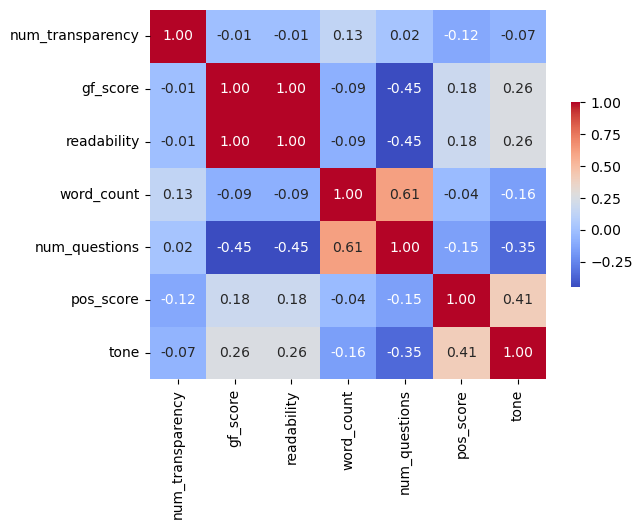

In [12]:
corr = df.loc[:, 'num_transparency':].corr()

sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm', cbar_kws={"shrink": .5})


## Histogram for all (NOT USED)

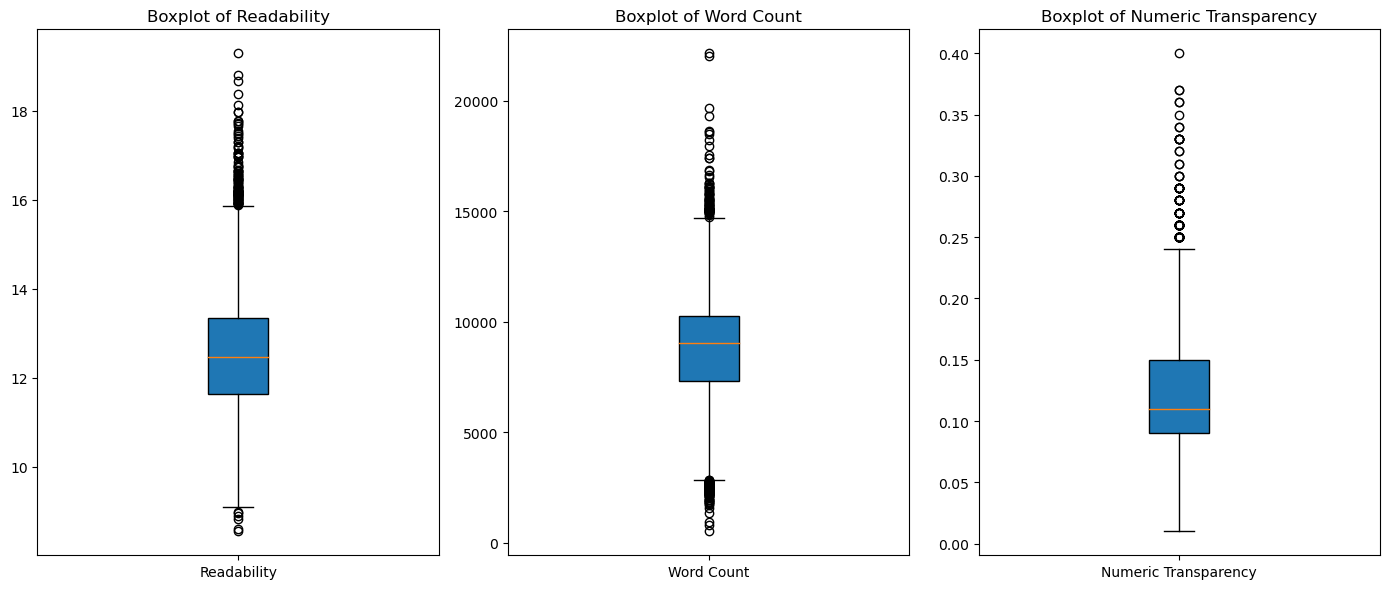

In [91]:
plt.figure(figsize=(14, 6))

# Boxplot for readability
plt.subplot(2, 3, 1)  # 1 row, 3 columns, first plot
plt.boxplot(df['readability'], patch_artist=True)
plt.title('Boxplot of Readability')
plt.xticks([1], ['Readability'])

# Boxplot for word_count
plt.subplot(2, 3, 2)  # 1 row, 3 columns, second plot
plt.boxplot(df['word_count'], patch_artist=True)
plt.title('Boxplot of Word Count')
plt.xticks([1], ['Word Count'])

plt.subplot(2, 3, 3)  # 1 row, 3 columns, third plot
plt.boxplot(df['num_transparency'], patch_artist=True)
plt.title('Boxplot of Numeric Transparency')
plt.xticks([1], ['Numeric Transparency'])

# Show the plot with tight layout
plt.tight_layout()
plt.show()

## Distribution of features by rating

     ticker Rating  num_transparency
0      AAPL    AAA               NaN
1      AAPL     AA             0.111
2      AAPL      A               NaN
3      AAPL    BBB               NaN
4      AAPL     BB               NaN
...     ...    ...               ...
5355    ZTS      B               NaN
5356    ZTS    CCC               NaN
5357    ZTS     CC               NaN
5358    ZTS      C               NaN
5359    ZTS      D               NaN

[5360 rows x 3 columns]


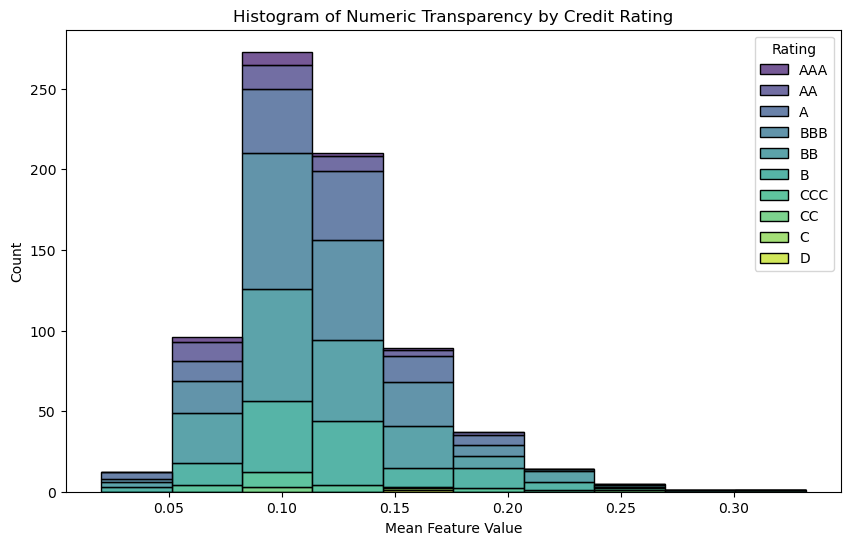

In [21]:
mean_feature_values = df.groupby(['ticker', 'Rating'])['num_transparency'].mean().reset_index()

# Display the means for verification
print(mean_feature_values)

# Step 2: Plot histograms of mean FeatureValue for each CreditRating
# This will create a histogram for each unique CreditRating in the dataset
plt.figure(figsize=(10, 6))
sns.histplot(data=mean_feature_values, x='num_transparency', hue='Rating', multiple='stack', bins=10, palette='viridis')
plt.title('Histogram of Numeric Transparency by Credit Rating')
plt.xlabel('Mean Feature Value')
plt.ylabel('Count')
plt.show()


In [38]:
df_sec_rating = df.groupby(['Sector', 'Rating'])['num_transparency'].mean().reset_index()

/tmp/ipykernel_3118953/661820212.py:15: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(sector_data['RatingNum'], sector_data['num_transparency'],


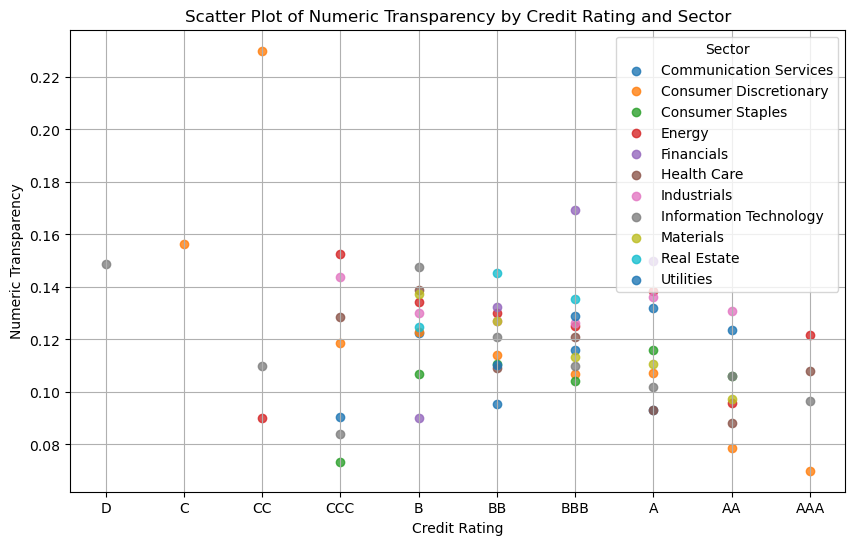

In [44]:
# Map the ratings to a numerical value for plotting
ratings_order = ['D', 'C', 'CC', 'CCC', 'B', 'BB', 'BBB', 'A', 'AA', 'AAA']
df_sec_rating['RatingNum'] = df_sec_rating['Rating'].apply(lambda x: ratings_order.index(x))

# Let's define a colormap that maps each sector to a color.
sectors = df_sec_rating['Sector'].unique()
colors = plt.cm.rainbow(np.linspace(0, 1, len(sectors)))
color_map = dict(zip(sectors, colors))

# Now let's plot the scatter plot.
plt.figure(figsize=(10, 6))
for sector in sectors:
    # Select only rows of the current sector
    sector_data = df_sec_rating[df_sec_rating['Sector'] == sector]
    plt.scatter(sector_data['RatingNum'], sector_data['num_transparency'], 
                label=sector, alpha=0.8, cmap='viridis')

# Formatting the plot
plt.xticks(range(len(ratings_order)), ratings_order)
plt.xlabel('Credit Rating')
plt.ylabel('Numeric Transparency')
plt.title('Scatter Plot of Numeric Transparency by Credit Rating and Sector')
plt.legend(title='Sector')
plt.grid(True)
plt.show()


## Examples of numeric transparency

In [14]:
#df.dropna(subset=['readability'])    # Drop 3 calls with wrong earning call

In [15]:
def find_nlp_feature_examples(feature_list, feat_name):
    # Finding the max value
    max_value = df[feat_name].max()
    # Finding the index of the max value
    max_index = df[feat_name].idxmax()
    
    min_value = df[feat_name].min()
    min_index = df[feat_name].idxmin()

    sample_good = df.loc[max_index]['transcript']
    sample_bad = df.loc[min_index]['transcript']
    #print(min_index)
    
    return sample_good, sample_bad

In [21]:
samples = find_nlp_feature_examples(df['num_transparency'], 'num_transparency')
#print(samples[0])

2602
Operator: Good day, ladies and gentlemen, and welcome to the Third Quarter 2013 Comstock Resources Earnings Conference Call. My name is Lisa, and I will be your coordinator for today. [Operator Instructions] As a reminder, this conference is being recorded for replay purposes. I would now like to turn the call over to your host, Mr. Jay Allison, Chief Executive Officer. Please proceed, sir.
Miles Jay Allison: Thank you, Lisa. Before we start, I've got about 6 or 7 bullet points that I want to make sure that those that are attending the conference, if they leave early, they get these bullet points pertaining to the quarter. As you all know, this is the first quarter that we've had -- where we've had the Permian divestiture behind us. With the proceeds from the Permian sale, we have retired $735 million of debt, really, in the last 6 months. So the question is, what do we do with that? And the bullet points are, one, because of that, we've now been able to double our Eagle Ford rig 

## Readability and Word Count

In [79]:
mean_feature_values

,Rating,readability,word_count,normalized_sizes
0,AAA,12.808481,10785.080292,1.000000
1,AA,12.327716,9309.779762,0.843077
2,A,12.456005,9093.044203,0.820024
3,BBB,12.521023,9185.751458,0.829885
4,BB,12.582312,8359.104390,0.741957
5,B,12.663641,7869.272329,0.689855
6,CCC,12.611367,8650.308108,0.772932
7,CC,12.847732,6084.357143,0.500000
8,C,13.487426,9939.812500,0.910092
9,D,13.021960,8799.333333,0.788783


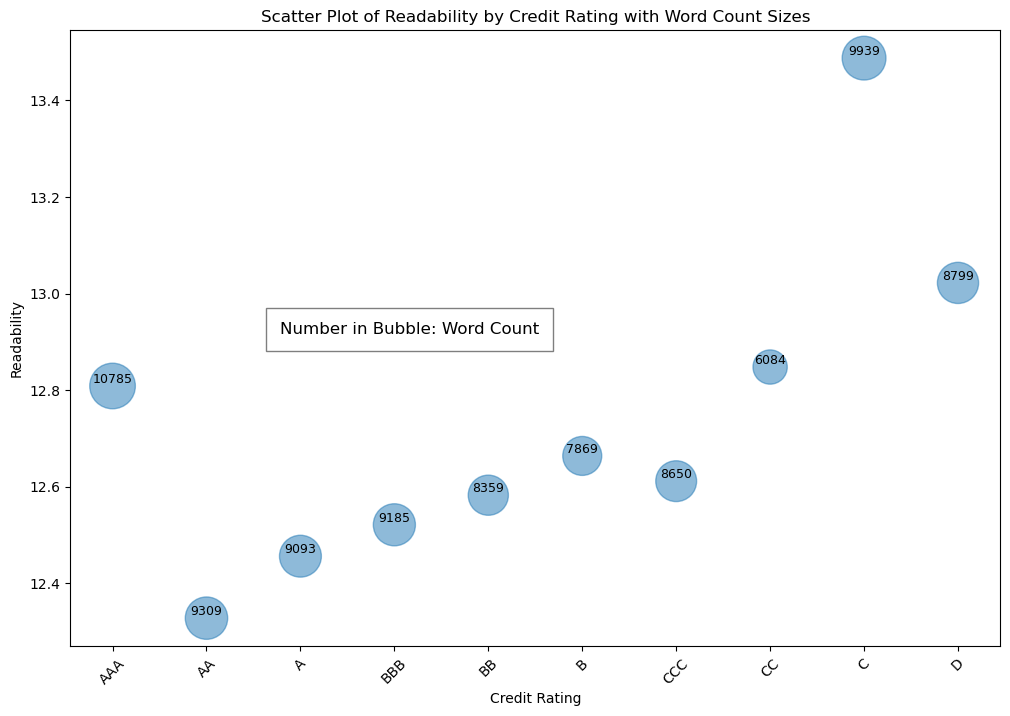

In [89]:
plt.figure(figsize=(12, 8))
scatter = plt.scatter('Rating', 'readability', s=mean_feature_values['word_count']/10, alpha=0.5, data=mean_feature_values)

# Adding titles and labels
plt.xlabel('Credit Rating')
plt.ylabel('Readability')
plt.title('Scatter Plot of Readability by Credit Rating with Word Count Sizes')
plt.xticks(rotation=45)

for i, row in mean_feature_values.iterrows():
    plt.text(row['Rating'], row['readability'], f"{int(row['word_count'])}", fontsize=9,
             ha='center', va='bottom')
    
text = plt.text(0.3, 0.5, 'Number in Bubble: Word Count', fontsize=12, 
                bbox={'facecolor': 'white', 'alpha': 0.5, 'pad': 10},
                transform=plt.gcf().transFigure)


# Show plot with legend for sizes
#plt.legend(*scatter.legend_elements("sizes", num=6), title="Word Count / 10")


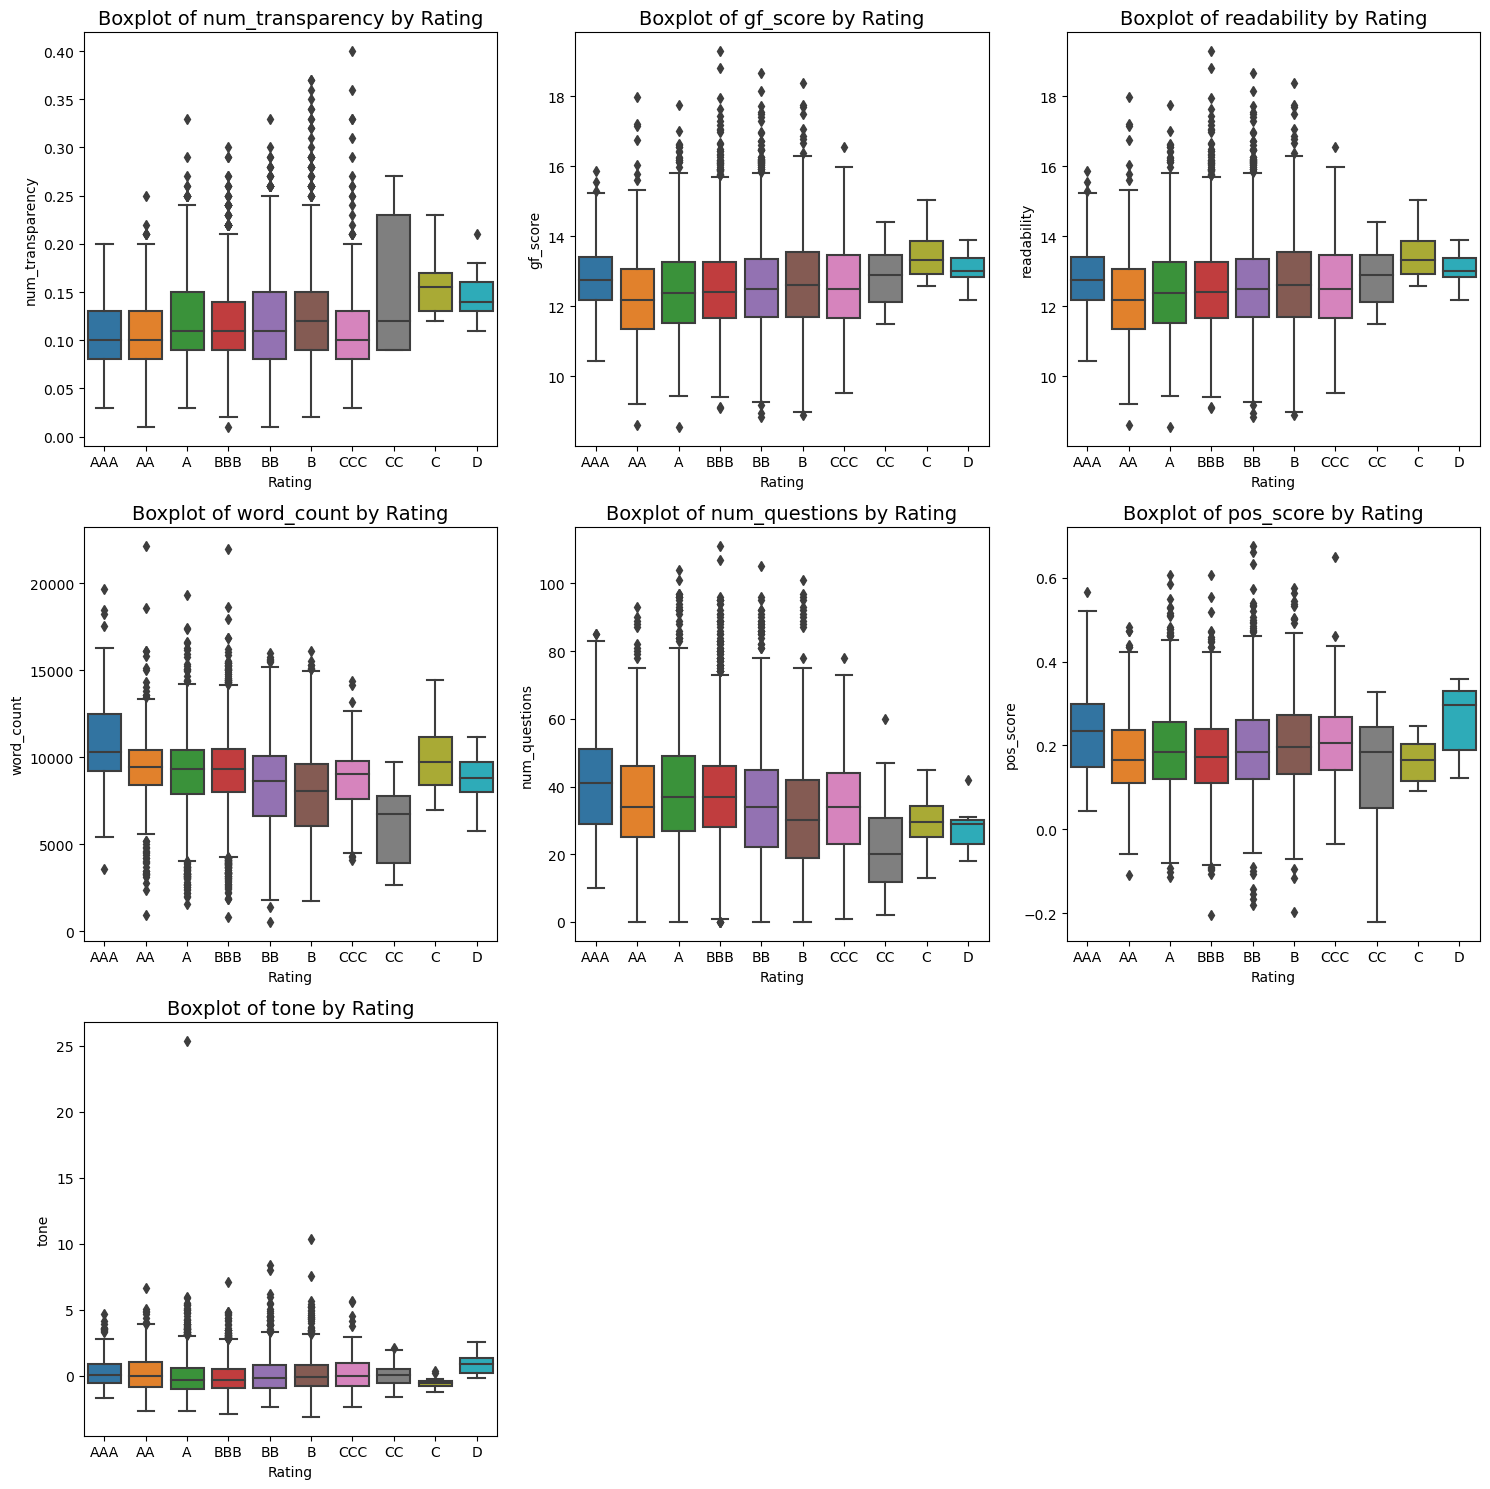

In [24]:
df = df.drop('index', axis=1)
num_columns = df.select_dtypes(include=[float, int]).columns

# Determine the layout of the subplots (3 columns per row)
num_rows = int(len(num_columns) / 3) + (len(num_columns) % 3 > 0)

# Create subplots with the determined layout
fig, axes = plt.subplots(num_rows, 3, figsize=(15, num_rows * 5))
axes = axes.flatten()  # Flatten the array of axes for easy iteration

# Iterate over the numerical columns to create a boxplot for each
for i, col in enumerate(num_columns):
    sns.boxplot(x='Rating', y=col, data=df, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col} by Rating', fontsize=14)

# Hide any unused subplots if the number of plots is not a multiple of grid size
for ax in axes[len(num_columns):]:
    ax.axis('off')

plt.tight_layout()
plt.show()
